In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from statsmodels.sandbox.stats.runs import runstest_1samp
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import acf
from sklearn.decomposition import PCA


In [2]:
# Loading a CSV file into a DataFrame
df_void = pd.read_csv('../Processed dataset/df_voids.csv')
df_parts = pd.read_csv('../Processed dataset/df_parts.csv')
df_void_new = pd.read_csv('../Processed dataset/df_new_voids.csv')
df_parts_new = pd.read_csv('../Processed dataset/df_new_parts.csv')

#df_parts.head(10)
df_void.head(10)

,Image name,Position,Region type,ID,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels],Part_ID,Num_voids
0,img01.bmp,top_left,void,1,94,37.556,0.773,1.445,0.949,0.696,14.463,9.178,10.940,0,41
1,img01.bmp,top_left,void,2,95,46.142,0.935,-1.466,0.872,0.565,19.647,6.959,10.998,0,41
2,img01.bmp,top_left,void,3,239,77.527,0.942,-1.432,0.909,0.569,31.984,10.699,17.444,0,41
3,img01.bmp,top_left,void,4,195,61.420,0.885,1.545,0.907,0.577,24.535,11.419,15.757,0,41
4,img01.bmp,top_left,void,5,146,54.770,0.883,0.818,0.912,0.477,20.885,9.814,13.634,0,41
5,img01.bmp,top_left,void,6,192,71.835,0.954,-1.440,0.881,0.529,30.397,9.124,15.635,0,41
6,img01.bmp,top_left,void,7,322,72.770,0.324,0.429,0.947,0.610,22.009,20.826,20.248,0,41
7,img01.bmp,top_left,void,8,342,76.184,0.498,0.893,0.927,0.594,23.752,20.593,20.867,0,41
8,img01.bmp,top_left,void,9,292,78.912,0.904,-0.973,0.927,0.438,31.198,13.312,19.282,0,41
9,img01.bmp,top_left,void,10,306,75.527,0.731,0.131,0.916,0.567,25.444,17.365,19.739,0,41


In [3]:
df_void_new.head(10)

,Image name,Position,Region type,ID,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels],Part_ID,Num_voids,Num_Wpixels,Num_Bpixels,Wpixels_ratio
0,img01.bmp,top_left,void,1,104,40.142,0.752,-1.556,0.912,0.693,14.874,9.809,11.507,0,41,38291,13692,0.736606
1,img01.bmp,top_left,void,2,106,47.799,0.935,-1.335,0.898,0.589,20.548,7.293,11.617,0,41,38291,13692,0.736606
2,img01.bmp,top_left,void,3,263,80.355,0.939,-1.307,0.895,0.501,32.887,11.318,18.299,0,41,38291,13692,0.736606
3,img01.bmp,top_left,void,4,211,64.006,0.884,-1.478,0.887,0.601,25.354,11.839,16.391,0,41,38291,13692,0.736606
4,img01.bmp,top_left,void,5,159,56.355,0.874,0.932,0.888,0.523,21.442,10.408,14.228,0,41,38291,13692,0.736606
5,img01.bmp,top_left,void,6,211,73.077,0.951,-1.313,0.847,0.471,31.267,9.708,16.391,0,41,38291,13692,0.736606
6,img01.bmp,top_left,void,7,339,75.841,0.326,0.692,0.929,0.589,22.505,21.278,20.776,0,41,38291,13692,0.736606
7,img01.bmp,top_left,void,8,361,78.184,0.502,1.001,0.928,0.602,24.343,21.051,21.439,0,41,38291,13692,0.736606
8,img01.bmp,top_left,void,9,329,77.770,0.718,0.249,0.901,0.580,26.044,18.126,20.467,0,41,38291,13692,0.736606
9,img01.bmp,top_left,void,10,311,82.083,0.900,-0.839,0.899,0.461,31.733,13.860,19.899,0,41,38291,13692,0.736606


In [5]:
df_parts.head(10)

,Image name,Position,Region type,ID,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels],Part_ID,Num_voids
0,img01.bmp,top_left,part,0,39334,3979.892,0.145,-1.399,0.775,0.658,276.941,274.023,223.789,0,41
1,img01.bmp,bottom_left,part,0,38974,4087.348,0.148,-1.234,0.767,0.721,278.216,275.169,222.763,1,42
2,img01.bmp,top_right,part,0,39176,3988.051,0.163,1.528,0.780,0.712,275.773,272.072,223.339,2,46
3,img01.bmp,bottom_right,part,0,38904,4011.739,0.161,-1.186,0.772,0.670,276.860,273.250,222.563,3,47
4,img02.bmp,top_left,part,0,38376,4133.306,0.119,-0.789,0.755,0.707,278.803,276.832,221.047,4,42
5,img02.bmp,bottom_left,part,0,38086,4233.674,0.104,-0.863,0.750,0.729,279.073,277.567,220.210,5,42
6,img02.bmp,top_right,part,0,37905,4290.058,0.052,-0.869,0.752,0.723,277.310,276.929,219.686,6,47
7,img02.bmp,bottom_right,part,0,38740,4084.335,0.128,-0.828,0.764,0.720,277.947,275.666,222.093,7,44
8,img03.bmp,top_left,part,0,39202,4034.821,0.125,-1.325,0.774,0.722,276.453,274.286,223.413,8,43
9,img03.bmp,bottom_left,part,0,39079,4049.892,0.135,-1.164,0.771,0.714,277.074,274.527,223.063,9,43


In [4]:
df_parts_new.head(10)

,Image name,Position,Region type,ID,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels],Part_ID,Num_voids,Num_Wpixels,Num_Bpixels,Wpixels_ratio
0,img01.bmp,top_left,part,0,38291,4105.674,0.153,-1.268,0.760,0.743,277.925,274.667,220.802,0,41,38291,13692,0.736606
1,img01.bmp,bottom_left,part,0,37887,4155.306,0.157,-1.304,0.752,0.735,279.026,275.584,219.634,1,42,37887,14096,0.728834
2,img01.bmp,top_right,part,0,37334,4106.076,0.189,1.564,0.752,0.734,277.777,272.791,218.026,2,46,37334,14194,0.724538
3,img01.bmp,bottom_right,part,0,37868,4139.319,0.164,-1.070,0.756,0.738,277.900,274.158,219.579,3,45,37868,13661,0.734887
4,img02.bmp,top_left,part,0,36599,4223.005,0.118,-0.817,0.730,0.713,280.140,278.182,215.869,4,41,36599,15385,0.704044
5,img02.bmp,bottom_left,part,0,36382,4305.088,0.104,-0.787,0.722,0.706,280.715,279.187,215.228,5,42,36382,15602,0.699869
6,img02.bmp,top_right,part,0,36808,4366.544,0.067,-1.190,0.737,0.721,278.233,277.617,216.484,6,47,36808,14721,0.714316
7,img02.bmp,bottom_right,part,0,36903,4180.034,0.127,-0.903,0.738,0.723,279.169,276.892,216.763,7,43,36903,15081,0.709892
8,img03.bmp,top_left,part,0,37697,4124.720,0.123,-1.276,0.753,0.735,277.368,275.259,219.083,8,43,37697,14059,0.728360
9,img03.bmp,bottom_left,part,0,37626,4153.833,0.117,-0.853,0.751,0.733,277.820,275.897,218.876,9,43,37626,14130,0.726988


In [6]:
df_parts['Part_ID'] # 40 different images

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
Name: Part_ID, dtype: int64

### Analisi df_parts e df_parts_new

Vedo quante parti vuote cambiano

In [7]:
df_void_new.loc[df_void_new['Part_ID'] == 39].shape

(47, 15)

In [8]:
df_void.loc[df_void['Part_ID'] == 39].shape

(47, 15)

In [9]:
print(df_parts_new['Num_voids'].values - df_parts['Num_voids'].values)  # .values è necessario se no sottrazione viene fatta a parità di indici

[ 0  0  0 -2 -1  0  0 -1  0  0  0  0  0 -2  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0]


In [19]:
# normality test for df_parts

start_index = 4

end_index = len(df_parts.columns) 

for col in df_parts.columns[start_index:end_index]:
    dataset = df_parts.loc[:, col].values 

    
# Verify the normality of the data
# Shapiro-Wilk test
    _, p_value_SW = stats.shapiro(dataset)
    print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW)))

p-value of the Shapiro-Wilk test for "Area [pixels]": 0.952
p-value of the Shapiro-Wilk test for "Perimeter [pixels]": 0.634
p-value of the Shapiro-Wilk test for "Eccentricity": 0.000
p-value of the Shapiro-Wilk test for "Orientation [radians]": 0.000
p-value of the Shapiro-Wilk test for "Solidity": 0.096
p-value of the Shapiro-Wilk test for "Extent": 0.004
p-value of the Shapiro-Wilk test for "Major Axis Length [pixels]": 0.223
p-value of the Shapiro-Wilk test for "Minor Axis Length [pixels]": 0.204
p-value of the Shapiro-Wilk test for "Equivalent Diameter [pixels]": 0.954
p-value of the Shapiro-Wilk test for "Part_ID": 0.124
p-value of the Shapiro-Wilk test for "Num_voids": 0.002


In [18]:
# normality test for df parts new
start_index = 4

end_index = len(df_parts_new.columns) 

for col in df_parts_new.columns[start_index:end_index]:
    dataset = df_parts_new.loc[:, col].values 

    
# Verify the normality of the data
# Shapiro-Wilk test
    _, p_value_SW = stats.shapiro(dataset)
    print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW)))


p-value of the Shapiro-Wilk test for "Area [pixels]": 0.731
p-value of the Shapiro-Wilk test for "Perimeter [pixels]": 0.869
p-value of the Shapiro-Wilk test for "Eccentricity": 0.097
p-value of the Shapiro-Wilk test for "Orientation [radians]": 0.000
p-value of the Shapiro-Wilk test for "Solidity": 0.267
p-value of the Shapiro-Wilk test for "Extent": 0.369
p-value of the Shapiro-Wilk test for "Major Axis Length [pixels]": 0.097
p-value of the Shapiro-Wilk test for "Minor Axis Length [pixels]": 0.317
p-value of the Shapiro-Wilk test for "Equivalent Diameter [pixels]": 0.704
p-value of the Shapiro-Wilk test for "Part_ID": 0.124
p-value of the Shapiro-Wilk test for "Num_voids": 0.002
p-value of the Shapiro-Wilk test for "Num_Wpixels": 0.731
p-value of the Shapiro-Wilk test for "Num_Bpixels": 0.124
p-value of the Shapiro-Wilk test for "Wpixels_ratio": 0.351


Per alcune features ho normalità ma bootstrap t -intervals vanno bene in ogni caso...  
 classici CI potrebbero essere più precisi, da provare...  
 
Test: H0: df_parts = df_parts_new

https://acclab.github.io/bootstrap-confidence-intervals.html   
https://www2.stat.duke.edu/~banks/111-lectures.dir/lect13.pdf

In [20]:
import numpy as np
# pip install tabulate
from tabulate import tabulate

B = int(1e3)
results = []

start_index = 4

end_index = len(df_parts.columns) 



for col in df_parts.columns[start_index:end_index]:
    dataset1 = df_parts_new.loc[:, col].values # STAI RIMUOVENDO DATI 
    dataset2 = df_parts.loc[:, col].values

    dimD1 = dataset1.shape[0]
    dimD2 = dataset2.shape[0]
    min_dim = min(dimD1, dimD2)
    dataset1 = dataset1[:min_dim]
    dataset2 = dataset2[:min_dim]
    dataset = dataset1 - dataset2

    mu_hat = np.mean(dataset)
    sigma_hat = np.std(dataset)

    np.random.seed(42)
    t_boot = np.zeros(B)
    for b in range(B):
        x_boot = np.random.choice(dataset, replace=True, size=len(dataset))
        mu_boot = np.mean(x_boot)
        sigma_boot = np.std(x_boot)
    
        t_boot[b] = (mu_boot - mu_hat) / sigma_boot

    ALPHA = 0.05
    q_low = np.percentile(t_boot, ALPHA/2 * 100)
    q_up = np.percentile(t_boot, (1 - ALPHA/2) * 100)
    CI = {
        'Lower CI': mu_hat - q_up * sigma_hat,
        'Point Estimate': mu_hat,
        'Upper CI': mu_hat - q_low * sigma_hat
    }

    if (CI['Upper CI'] * CI['Lower CI'] > 0 ): # 0 not included 
        print(f"ATTENZIONE: L'intervallo di confidenza per la colonna {col} non contiene zero!")

    results.append([f"{col}", CI['Lower CI'], CI['Point Estimate'], CI['Upper CI']])

print(tabulate(results, headers=['Column', 'Lower CI', 'Point Estimate', 'Upper CI'], tablefmt='grid'))


ATTENZIONE: L'intervallo di confidenza per la colonna Area [pixels] non contiene zero!
ATTENZIONE: L'intervallo di confidenza per la colonna Perimeter [pixels] non contiene zero!
ATTENZIONE: L'intervallo di confidenza per la colonna Solidity non contiene zero!
ATTENZIONE: L'intervallo di confidenza per la colonna Extent non contiene zero!
ATTENZIONE: L'intervallo di confidenza per la colonna Major Axis Length [pixels] non contiene zero!
ATTENZIONE: L'intervallo di confidenza per la colonna Minor Axis Length [pixels] non contiene zero!
ATTENZIONE: L'intervallo di confidenza per la colonna Equivalent Diameter [pixels] non contiene zero!
ATTENZIONE: L'intervallo di confidenza per la colonna Num_voids non contiene zero!
+------------------------------+----------------+------------------+----------------+
| Column                       |       Lower CI |   Point Estimate |       Upper CI |
+==============================+================+==================+================+
| Area [pixels] 

c:\Users\feder\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars


### Analisi df_void e df_new_void  
Studio diviso per immagini  
Test: H0: df_void = df_void_new a parità di immagini


In [22]:
 # normality test df void for img = 
start_index = 4

end_index = len(df_void.columns) 

img = 0

for col in df_void.columns[start_index:end_index]:
    dataset = df_void.loc[df_void['Part_ID'] == img, col].values  # In teoria importa l'ordine perchè dovrei confrontare buco per buco, posso usare comunque t-boostrap? 
# Verify the normality of the data
# Shapiro-Wilk test
    _, p_value_SW = stats.shapiro(dataset)
    print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW)))


p-value of the Shapiro-Wilk test for "Area [pixels]": 0.265
p-value of the Shapiro-Wilk test for "Perimeter [pixels]": 0.220
p-value of the Shapiro-Wilk test for "Eccentricity": 0.000
p-value of the Shapiro-Wilk test for "Orientation [radians]": 0.001
p-value of the Shapiro-Wilk test for "Solidity": 0.000
p-value of the Shapiro-Wilk test for "Extent": 0.005
p-value of the Shapiro-Wilk test for "Major Axis Length [pixels]": 0.792
p-value of the Shapiro-Wilk test for "Minor Axis Length [pixels]": 0.089
p-value of the Shapiro-Wilk test for "Equivalent Diameter [pixels]": 0.383


In [23]:
# normality test df_void_new for img = 
start_index = 4

end_index = len(df_void_new.columns) 

img = 0

for col in df_void_new.columns[start_index:end_index]:
    dataset = df_void_new.loc[df_void_new['Part_ID'] == img, col].values  # In teoria importa l'ordine perchè dovrei confrontare buco per buco, posso usare comunque t-boostrap? 
# Verify the normality of the data
# Shapiro-Wilk test
    _, p_value_SW = stats.shapiro(dataset)
    print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW)))

p-value of the Shapiro-Wilk test for "Area [pixels]": 0.290
p-value of the Shapiro-Wilk test for "Perimeter [pixels]": 0.322
p-value of the Shapiro-Wilk test for "Eccentricity": 0.000
p-value of the Shapiro-Wilk test for "Orientation [radians]": 0.001
p-value of the Shapiro-Wilk test for "Solidity": 0.010
p-value of the Shapiro-Wilk test for "Extent": 0.027
p-value of the Shapiro-Wilk test for "Major Axis Length [pixels]": 0.795
p-value of the Shapiro-Wilk test for "Minor Axis Length [pixels]": 0.090
p-value of the Shapiro-Wilk test for "Equivalent Diameter [pixels]": 0.351
p-value of the Shapiro-Wilk test for "Part_ID": 1.000
p-value of the Shapiro-Wilk test for "Num_voids": 1.000
p-value of the Shapiro-Wilk test for "Num_Wpixels": 1.000


c:\Users\feder\anaconda3\envs\qda\lib\site-packages\scipy\stats\morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In alcuni casi ho normalità, ma per avere risualto più immediato faccio solo boostrap t-intervals

In [42]:
import numpy as np
# pip install tabulate
from tabulate import tabulate

B = int(1e3)
results = []

start_index = 4

end_index = len(df_void.columns) 

diff = np.zeros(39)

import numpy as np
from tabulate import tabulate

# Definisci il range di immagini da 0 a 39
for img in range(40):

    # Itera sulle colonne del dataframe
    for col in df_void.columns[start_index:end_index]:
        dataset1 = df_void_new.loc[df_void_new['Part_ID'] == img, col].values  # In teoria importa l'ordine perchè dovrei confrontare buco per buco, posso usare comunque t-boostrap? 
                                                                               # Io direi di sì ( test sulla media!! ) + STAI RIMUOVENDO DATI
        dataset2 = df_void.loc[df_void['Part_ID'] == img, col].values
        dimD1 = dataset1.shape[0]  # Assume che il numero di righe sia la dimensione rilevante
        dimD2 = dataset2.shape[0]
        min_dim = min(dimD1, dimD2)
        dataset1 = dataset1[:min_dim]
        dataset2 = dataset2[:min_dim]
        dataset = dataset1 - dataset2

        mu_hat = np.mean(dataset)
        sigma_hat = np.std(dataset)

        np.random.seed(42)
        t_boot = np.zeros(B)
        
        # Esegui il bootstrap
        for b in range(B):
            x_boot = np.random.choice(dataset, replace=True, size=len(dataset))
            mu_boot = np.mean(x_boot)
            sigma_boot = np.std(x_boot)
    
            t_boot[b] = (mu_boot - mu_hat) / sigma_boot

        ALPHA = 0.05
        q_low = np.percentile(t_boot, ALPHA/2 * 100)
        q_up = np.percentile(t_boot, (1 - ALPHA/2) * 100)
        CI = {
            'Lower CI': mu_hat - q_up * sigma_hat,
            'Point Estimate': mu_hat,
            'Upper CI': mu_hat - q_low * sigma_hat
        }

        if (CI['Upper CI'] * CI['Lower CI'] > 0 ): # 0 not included 
            print(f"ATTENZIONE: L'intervallo di confidenza per la colonna {col} non contiene zero!")
            diff[img] = 1 

        results.append([f"{col}\n(Part_ID = {img})", CI['Lower CI'], CI['Point Estimate'], CI['Upper CI']])

    print(tabulate(results, headers=['Column', 'Lower CI', 'Point Estimate', 'Upper CI'], tablefmt='grid'))


ATTENZIONE: L'intervallo di confidenza per la colonna Solidity non contiene zero!


c:\Users\feder\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars


+------------------------------+-------------+------------------+--------------+
| Column                       |    Lower CI |   Point Estimate |     Upper CI |
+==============================+=============+==================+==============+
| Area [pixels]                | -27.3227    |      18.8049     |  63.3162     |
| (Part_ID = 0)                |             |                  |              |
+------------------------------+-------------+------------------+--------------+
| Perimeter [pixels]           |  -3.93578   |       3.15383    |   9.72439    |
| (Part_ID = 0)                |             |                  |              |
+------------------------------+-------------+------------------+--------------+
| Eccentricity                 |  -0.0363188 |      -0.00497561 |   0.0276549  |
| (Part_ID = 0)                |             |                  |              |
+------------------------------+-------------+------------------+--------------+
| Orientation [radians]     

In [16]:
diff
# queste immagini hanno valori diversi in almeno una colonna 

# esegui codice solo per questi indici per indagare sulle differenze

array([1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 0.])

### Commenti 

I numeri di vuoti cambiano significativamente tra i due dataset.   
Le misurazioni per le parti dipende.  
Al contrario ( se gli intevalli bootstrap sono ok) le misurazioni dei vuoti non dovrebbero avere differenze significative a parità di immagini.   

Quale dataset scegliamo? Forse direi il secondo perchè le misurazioni derivano da un'immagine " più precisa"

ENGLISH BELOW:
The numbers of voids change significantly between the two datasets.
The measurements for the parts depends.
On the contrary (if the bootstrap intervals are ok) the void measurements should not have significant differences for the same images.

Which dataset do we choose? Maybe I would say the second because the measurements derive from a "more precise" image



Una volta scelto il dataset  

Osservazioni:  
Da df_parts:
- Num_void sembra indicativo --> un oggetto che non ha un numero di vuoti entro un certo intervallo potrebbe essere difettoso  

Da df_void:  

- Come variabile aggiuntiva si potrebbe calcolare quanto spazio vuoto caraterrizza un'immmagine ( in termini di area e perimetro).  
- Inoltre a parità di ugual rotazione dell'immagine ogni void dovrebbe avere la stessa rotazione, perimetro e area ( ovvero void1 di immagine 1 = void1 di immagine 2 = ...)  
(NB: in teoria tutte le features dovrebbero essere uguali, si può fare un controllo su tutte e tenere quelle che hanno distrbuzione normale)


ENGLISH BELOW:
Once the dataset has been chosen

Observations:
From df_parts:
- Num_void seems indicative --> an object that does not have a number of voids within a certain range may be defective

From df_void:

- As an additional variable you could calculate how much empty space an image represents (in terms of area and perimeter).
- Furthermore, with the same rotation of the image, each void should have the same rotation, perimeter and area (i.e. void1 of image 1 = void1 of image 2 = ...)
(NB: in theory all the features should be the same, you can check them all and keep those that have normal distribution)
- For each image e for each variable, we can compute the mean and then compute the t-bootsrap interval  

ATT!!! If a variable has gaussian distribution, it could be useful to compare standard CI and boostrap CI




### Boostrap t-intervals and standard CI for df_parts_new

In [26]:
# Boostrap 

import numpy as np
# pip install tabulate
from tabulate import tabulate

B = int(1e3)
results = []

start_index = 4

end_index = len(df_parts_new.columns) 



for col in df_parts_new.columns[start_index:end_index]:
    dataset = df_parts_new.loc[:, col].values

    mu_hat = np.mean(dataset)
    sigma_hat = np.std(dataset)

    np.random.seed(42)
    t_boot = np.zeros(B)
    for b in range(B):
        x_boot = np.random.choice(dataset, replace=True, size=len(dataset))
        mu_boot = np.mean(x_boot)
        sigma_boot = np.std(x_boot)
    
        t_boot[b] = (mu_boot - mu_hat) / sigma_boot

    ALPHA = 0.05
    q_low = np.percentile(t_boot, ALPHA/2 * 100)
    q_up = np.percentile(t_boot, (1 - ALPHA/2) * 100)
    CI = {
        'Lower CI': mu_hat - q_up * sigma_hat,
        'Point Estimate': mu_hat,
        'Upper CI': mu_hat - q_low * sigma_hat
    }

    results.append([f"{col}", CI['Lower CI'], CI['Point Estimate'], CI['Upper CI']])

print(tabulate(results, headers=['Column', 'Lower CI', 'Point Estimate', 'Upper CI'], tablefmt='grid'))
## AREA AND Num_Wpixels ARE THE SAME THING 


+------------------------------+--------------+------------------+--------------+
| Column                       |     Lower CI |   Point Estimate |     Upper CI |
+==============================+==============+==================+==============+
| Area [pixels]                | 36921.3      |     37182.1      | 37434.7      |
+------------------------------+--------------+------------------+--------------+
| Perimeter [pixels]           |  4174.05     |      4214.57     |  4254.74     |
+------------------------------+--------------+------------------+--------------+
| Eccentricity                 |     0.115212 |         0.1258   |     0.135312 |
+------------------------------+--------------+------------------+--------------+
| Orientation [radians]        |    -0.939147 |        -0.73485  |    -0.344891 |
+------------------------------+--------------+------------------+--------------+
| Solidity                     |     0.736739 |         0.74105  |     0.745641 |
+---------------

In [37]:
# Since Area, Perimeter, Eccentricity, Solidity, Extent, Major Axis Length,  Minor Axis Length, Equivalent Diameter, Num_Wpixels, Num_Bpixels, Wpixels_ratio are normal we can built the t-di-student CI
# We want an significant level of 0.05 in total, so we can built the Bonferroni CI
    
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal, f, t

## AREA AND Num_Wpixels ARE THE SAME THING -> I CONSIDER ONLY THE AREA
 

data_parts_normal  = np.column_stack((
    df_parts_new['Area [pixels]'],
    df_parts_new['Perimeter [pixels]'],
    df_parts_new['Eccentricity'],
    df_parts_new['Solidity'],
    df_parts_new['Extent'],
    df_parts_new['Major Axis Length [pixels]'],
    df_parts_new['Minor Axis Length [pixels]'],
    df_parts_new['Equivalent Diameter [pixels]'],
    df_parts_new['Num_Bpixels'],
    #df_parts_new['Num_Wpixels'],
    df_parts_new['Wpixels_ratio']
))

## AREA AND Num_Wpixels ARE THE SAME THING

column_names = [
    'Area',
    'Perimeter',
    'Eccentricity',
    'Solidity',
    'Extent',
    'Major Axis Length',
    'Minor Axis Length',
    'Equivalent Diameter',
    'Num_Bpixels',
    #'Num_Wpixels',
    'Wpixels_ratio'
]

# Creating DataFrame
df_parts_normal = pd.DataFrame(data_parts_normal, columns=column_names)


# Assuming 'dataset' is your DataFrame
# Dimensions
n = df_parts_normal.shape[0]
p = df_parts_normal.shape[1]
alpha = 0.05  # At level 5%


# Sample mean, covariance
x_mean = np.mean(df_parts_normal, axis = 0)
x_cov = np.cov(df_parts_normal, rowvar=False)
x_invcov = np.linalg.inv(x_cov)
cfr_fisher = ((n - 1) * p / (n - p)) * f.ppf(1 - alpha, p, n - p)

mu0 = np.array([0] * p)


# Bonferroni (for the difference) confidence intervals
k = p  # number of intervals I want to compute (set in advance)

cfr_t = t.ppf(1 - alpha / (2 * k), n - 1)
Bf = np.column_stack((
    x_mean - mu0 - cfr_t * np.sqrt(np.diag(x_cov) / n),
    x_mean - mu0,
    x_mean - mu0 + cfr_t * np.sqrt(np.diag(x_cov) / n)
))
Bf

### NB non cambiano così tanto...



array([[3.68025903e+04, 3.71821250e+04, 3.75616597e+04],
       [4.15352891e+03, 4.21457357e+03, 4.27561824e+03],
       [1.10467228e-01, 1.25800000e-01, 1.41132772e-01],
       [7.34295630e-01, 7.41050000e-01, 7.47804370e-01],
       [7.17514243e-01, 7.24100000e-01, 7.30685757e-01],
       [2.78423053e+02, 2.79064350e+02, 2.79705647e+02],
       [2.75917218e+02, 2.76700800e+02, 2.77484382e+02],
       [2.16456897e+02, 2.17569000e+02, 2.18681103e+02],
       [1.43215756e+04, 1.46598000e+04, 1.49980244e+04],
       [7.10600872e-01, 7.17207058e-01, 7.23813243e-01]])

In [38]:
df_parts_normal.corr()

,Area,Perimeter,Eccentricity,Solidity,Extent,Major Axis Length,Minor Axis Length,Equivalent Diameter,Num_Bpixels,Wpixels_ratio
Area,1.000000,-0.868500,0.487220,0.959698,0.958566,-0.405992,-0.642584,0.999978,-0.895196,0.948576
Perimeter,-0.868500,1.000000,-0.550430,-0.864030,-0.867636,0.358189,0.631061,-0.868537,0.782083,-0.826997
Eccentricity,0.487220,-0.550430,1.000000,0.458303,0.460953,0.107364,-0.525895,0.486802,-0.387367,0.427530
Solidity,0.959698,-0.864030,0.458303,1.000000,0.997646,-0.620355,-0.809900,0.959639,-0.972322,0.990632
Extent,0.958566,-0.867636,0.460953,0.997646,1.000000,-0.608374,-0.800234,0.958493,-0.970541,0.988958
Major Axis Length,-0.405992,0.358189,0.107364,-0.620355,-0.608374,1.000000,0.776953,-0.406034,0.721335,-0.639180
Minor Axis Length,-0.642584,0.631061,-0.525895,-0.809900,-0.800234,0.776953,1.000000,-0.642224,0.849243,-0.803835
Equivalent Diameter,0.999978,-0.868537,0.486802,0.959639,0.958493,-0.406034,-0.642224,1.000000,-0.895069,0.948515
Num_Bpixels,-0.895196,0.782083,-0.387367,-0.972322,-0.970541,0.721335,0.849243,-0.895069,1.000000,-0.990207
Wpixels_ratio,0.948576,-0.826997,0.427530,0.990632,0.988958,-0.639180,-0.803835,0.948515,-0.990207,1.000000


### Boostrap t-intervals  for df_voids_new ( with mean for each image)

In [41]:
## boostrap t intervals after computing the mean for each image

import numpy as np
# pip install tabulate
from tabulate import tabulate

B = int(1e3)
results = []

start_index = 4

end_index = len(df_void_new.columns) 

diff = np.zeros(39)
avgdataset = np.empty((0, df_void_new.columns[start_index:end_index].shape[0]))  # num_columns should be the number of columns in your dataset


# Definisci il range di immagini da 0 a 39
for img in range(40):

    dataset = df_void_new.loc[df_void_new['Part_ID'] == img, df_void_new.columns[start_index:end_index]].values      
    avg = np.mean(dataset, axis = 0)
    avgdataset = np.vstack((avgdataset, avg))


column_names = df_void_new.columns[start_index:end_index].tolist()

avgdataset = pd.DataFrame(avgdataset, columns= column_names)


# Itera sulle colonne del dataframe
for col in df_void_new.columns[start_index:end_index]:
    dataset = avgdataset.loc[:,col].values  

    mu_hat = np.mean(dataset)
    sigma_hat = np.std(dataset)

    np.random.seed(42)
    t_boot = np.zeros(B)
        
     # Esegui il bootstrap
    for b in range(B):
        x_boot = np.random.choice(dataset, replace=True, size=len(dataset))
        mu_boot = np.mean(x_boot)
        sigma_boot = np.std(x_boot)
    
        t_boot[b] = (mu_boot - mu_hat) / sigma_boot

    ALPHA = 0.05
    q_low = np.percentile(t_boot, ALPHA/2 * 100)
    q_up = np.percentile(t_boot, (1 - ALPHA/2) * 100)
    CI = {
        'Lower CI': mu_hat - q_up * sigma_hat,
        'Point Estimate': mu_hat,
        'Upper CI': mu_hat - q_low * sigma_hat
        }



    results.append([f"{col}", CI['Lower CI'], CI['Point Estimate'], CI['Upper CI']])

print(tabulate(results, headers=['Column', 'Lower CI', 'Point Estimate', 'Upper CI'], tablefmt='grid'))


+------------------------------+--------------+------------------+--------------+
| Column                       |     Lower CI |   Point Estimate |     Upper CI |
+==============================+==============+==================+==============+
| Area [pixels]                |   285.843    |       292.449    |   298.816    |
+------------------------------+--------------+------------------+--------------+
| Perimeter [pixels]           |    69.56     |        70.696    |    71.8184   |
+------------------------------+--------------+------------------+--------------+
| Eccentricity                 |     0.81815  |         0.824125 |     0.829432 |
+------------------------------+--------------+------------------+--------------+
| Orientation [radians]        |     0.108643 |         0.128994 |     0.15297  |
+------------------------------+--------------+------------------+--------------+
| Solidity                     |     0.913952 |         0.91691  |     0.919453 |
+---------------

In [45]:
#  Normality in the avg dataset

start_index = 4

end_index = len(df_void_new.columns) 


for col in df_void_new.columns[start_index:end_index]:
    dataset = df_void_new.loc[:, col].values  # In teoria importa l'ordine perchè dovrei confrontare buco per buco, posso usare comunque t-boostrap? 
# Verify the normality of the data
# Shapiro-Wilk test
    _, p_value_SW = stats.shapiro(dataset)
    print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW)))

# We don't have normality!!!! 

p-value of the Shapiro-Wilk test for "Area [pixels]": 0.000
p-value of the Shapiro-Wilk test for "Perimeter [pixels]": 0.000
p-value of the Shapiro-Wilk test for "Eccentricity": 0.000
p-value of the Shapiro-Wilk test for "Orientation [radians]": 0.000
p-value of the Shapiro-Wilk test for "Solidity": 0.000
p-value of the Shapiro-Wilk test for "Extent": 0.000
p-value of the Shapiro-Wilk test for "Major Axis Length [pixels]": 0.000
p-value of the Shapiro-Wilk test for "Minor Axis Length [pixels]": 0.000
p-value of the Shapiro-Wilk test for "Equivalent Diameter [pixels]": 0.000
p-value of the Shapiro-Wilk test for "Part_ID": 0.000
p-value of the Shapiro-Wilk test for "Num_voids": 0.000
p-value of the Shapiro-Wilk test for "Num_Wpixels": 0.000
p-value of the Shapiro-Wilk test for "Num_Bpixels": 0.000
p-value of the Shapiro-Wilk test for "Wpixels_ratio": 0.000


### Normality in df_parts_new

In [47]:
start_index = 4

end_index = len(df_parts_new.columns) 

for col in df_parts_new.columns[start_index:end_index]:
    dataset = df_parts_new.loc[:, col].values

    
# Verify the normality of the data
# Shapiro-Wilk test
    _, p_value_SW = stats.shapiro(dataset)
    print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW)))

# Area, Perimeter, Eccentricity, Solidity, Extent, Minor Axis Length, Equivalent Diameter have gaussian distribution !!!


p-value of the Shapiro-Wilk test for "Area [pixels]": 0.731
p-value of the Shapiro-Wilk test for "Perimeter [pixels]": 0.869
p-value of the Shapiro-Wilk test for "Eccentricity": 0.097
p-value of the Shapiro-Wilk test for "Orientation [radians]": 0.000
p-value of the Shapiro-Wilk test for "Solidity": 0.267
p-value of the Shapiro-Wilk test for "Extent": 0.369
p-value of the Shapiro-Wilk test for "Major Axis Length [pixels]": 0.097
p-value of the Shapiro-Wilk test for "Minor Axis Length [pixels]": 0.317
p-value of the Shapiro-Wilk test for "Equivalent Diameter [pixels]": 0.704
p-value of the Shapiro-Wilk test for "Part_ID": 0.124
p-value of the Shapiro-Wilk test for "Num_voids": 0.002
p-value of the Shapiro-Wilk test for "Num_Wpixels": 0.731
p-value of the Shapiro-Wilk test for "Num_Bpixels": 0.124
p-value of the Shapiro-Wilk test for "Wpixels_ratio": 0.351


### Analisi Num voids

p-value of the Shapiro-Wilk test for "Num_voids": 0.002
Lambda = -2.618


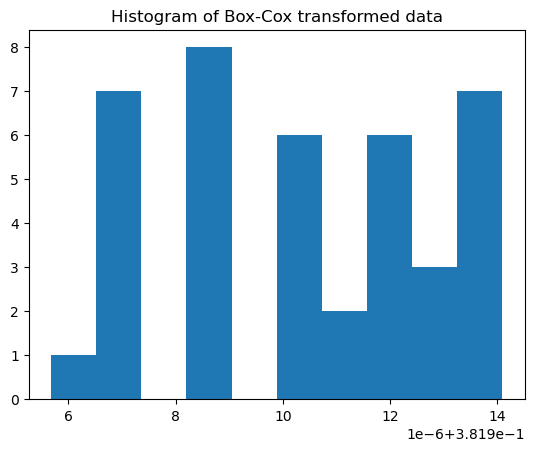

p-value of the Shapiro-Wilk test for "Num_voids_norm": 0.004


In [18]:
df_parts_new['Num_voids']

col = 'Num_voids'
# Verify the normality of the data
# Shapiro-Wilk test
_, p_value_SW = stats.shapiro(df_parts_new['Num_voids'])
print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW))) # no normality


## Box cox trasformation 

[Num_voids_norm, lmbda] = stats.boxcox(df_parts_new['Num_voids'])
# If lmbda is None (default), find the value of lmbda that maximizes the log-likelihood function and return it as the second output argument.

print('Lambda = %.3f' % lmbda)

plt.hist(Num_voids_norm)
plt.title('Histogram of Box-Cox transformed data')
plt.show()

col = 'Num_voids_norm'
_, p_value_SW = stats.shapiro(Num_voids_norm)
print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW))) 



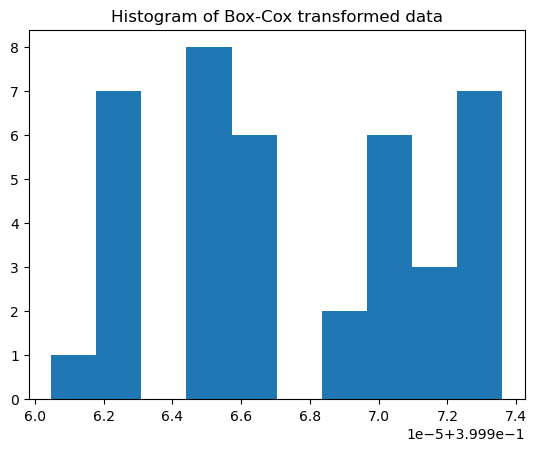

p-value of the Shapiro-Wilk test for "Num_voids_norm": 0.004


In [19]:
# Box-Cox transformation
Num_voids_norm = stats.boxcox(df_parts_new['Num_voids'], lmbda = -2.5 )
# If lmbda is None (default), find the value of lmbda that maximizes the log-likelihood function and return it as the second output argument.

plt.hist(Num_voids_norm)
plt.title('Histogram of Box-Cox transformed data')
plt.show()

col = 'Num_voids_norm'
_, p_value_SW = stats.shapiro(Num_voids_norm)
print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW)))

In [20]:
mean_value = df_parts_new['Num_voids'].mean()
std_value =df_parts_new['Num_voids'].std()

Num_voids_norm = (df_parts_new['Num_voids'] - mean_value) / std_value

_, p_value_SW = stats.shapiro(Num_voids_norm)
p_value_SW


0.0020220556762069464

Lambda = -2.618


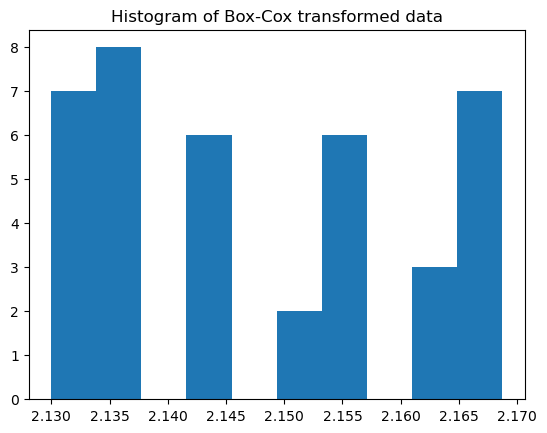

p-value of the Shapiro-Wilk test for "Num_voids_norm": 0.001


In [21]:
df_parts_new['Num_voids'] # indice 23 possibile ouliers num voids = 40

num_void_NO = pd.concat([df_parts_new['Num_voids'][:23], df_parts_new['Num_voids'][24:]])
num_void_NO

Num_voids_norm = stats.boxcox(num_void_NO, lmbda = -1/3)
# If lmbda is None (default), find the value of lmbda that maximizes the log-likelihood function and return it as the second output argument.

print('Lambda = %.3f' % lmbda)

plt.hist(Num_voids_norm)
plt.title('Histogram of Box-Cox transformed data')
plt.show()

col = 'Num_voids_norm'
_, p_value_SW = stats.shapiro(Num_voids_norm)
print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW))) 





PCA

On df_parts_new

In [9]:
dataNum = df_parts_new.select_dtypes(include=np.number)
dataset=dataNum.drop(columns=['ID','Part_ID'])
dataset.head(10)

,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels],Num_voids,Num_Wpixels,Num_Bpixels,Wpixels_ratio
0,38291,4105.674,0.153,-1.268,0.760,0.743,277.925,274.667,220.802,41,38291,13692,0.736606
1,37887,4155.306,0.157,-1.304,0.752,0.735,279.026,275.584,219.634,42,37887,14096,0.728834
2,37334,4106.076,0.189,1.564,0.752,0.734,277.777,272.791,218.026,46,37334,14194,0.724538
3,37868,4139.319,0.164,-1.070,0.756,0.738,277.900,274.158,219.579,45,37868,13661,0.734887
4,36599,4223.005,0.118,-0.817,0.730,0.713,280.140,278.182,215.869,41,36599,15385,0.704044
5,36382,4305.088,0.104,-0.787,0.722,0.706,280.715,279.187,215.228,42,36382,15602,0.699869
6,36808,4366.544,0.067,-1.190,0.737,0.721,278.233,277.617,216.484,47,36808,14721,0.714316
7,36903,4180.034,0.127,-0.903,0.738,0.723,279.169,276.892,216.763,43,36903,15081,0.709892
8,37697,4124.720,0.123,-1.276,0.753,0.735,277.368,275.259,219.083,43,37697,14059,0.728360
9,37626,4153.833,0.117,-0.853,0.751,0.733,277.820,275.897,218.876,43,37626,14130,0.726988


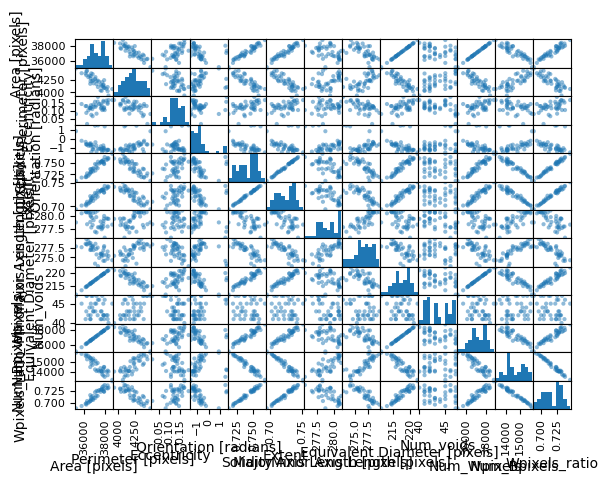

In [10]:
#Scatter plot
pd.plotting.scatter_matrix(dataset)
plt.show()

# can see some linear correlated vars and some very sparse/uncorrelated

In [ ]:
# Correlation matrix
cov_matrix = dataset.cov()
print(cov_matrix)

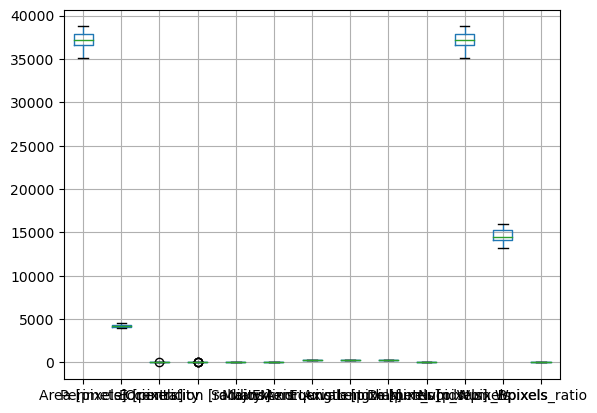

In [12]:
#Boxplot
dataset.boxplot()
plt.show() 
# need to scale vars

In [15]:
# Standardize the data
data_std = (dataset - dataset.mean()) / dataset.std()
data_std.head(10)

,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels],Num_voids,Num_Wpixels,Num_Bpixels,Wpixels_ratio
0,1.374602,-0.839314,0.834630,-0.676380,1.319989,1.350212,-0.835879,-1.221151,1.367749,-1.190932,1.374602,-1.346253,1.381585
1,0.873789,-0.456789,0.957370,-0.722051,0.762738,0.778694,-0.028135,-0.670558,0.873616,-0.741524,0.873789,-0.784271,0.828088
2,0.188270,-0.836215,1.939288,2.916432,0.762738,0.707254,-0.944459,-2.347555,0.193338,1.056110,0.188270,-0.647948,0.522110
3,0.850236,-0.580004,1.172164,-0.425187,1.041363,0.993013,-0.854220,-1.526769,0.850348,0.606701,0.850236,-1.389375,1.259156
4,-0.722863,0.064983,-0.239342,-0.104219,-0.769703,-0.792982,0.789146,0.889354,-0.719200,-1.190932,-0.722863,1.008785,-0.937490
5,-0.991864,0.697615,-0.668932,-0.066160,-1.326954,-1.293060,1.210992,1.492785,-0.990381,-0.741524,-0.991864,1.310642,-1.234783
6,-0.463779,1.171270,-1.804274,-0.577425,-0.282108,-0.221463,-0.609916,0.550112,-0.459019,1.505518,-0.463779,0.085132,-0.205883
7,-0.346014,-0.266204,0.036822,-0.213323,-0.212452,-0.078584,0.076776,0.114802,-0.340985,-0.292115,-0.346014,0.585908,-0.521005
8,0.638258,-0.692522,-0.085918,-0.686529,0.832394,0.778694,-1.244520,-0.865698,0.640511,-0.292115,0.638258,-0.835739,0.794300
9,0.550244,-0.468141,-0.270027,-0.149891,0.693081,0.635814,-0.912912,-0.482624,0.552938,-0.292115,0.550244,-0.736975,0.696600


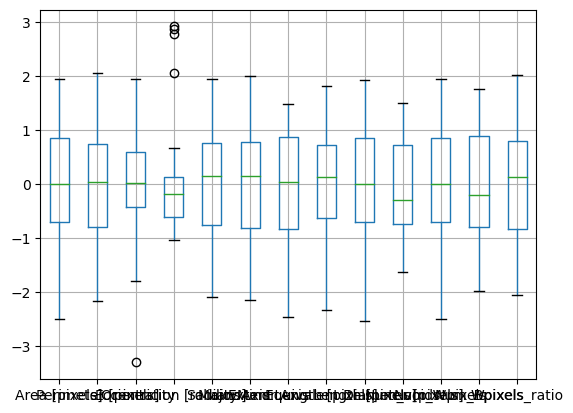

In [17]:
#cov matrix
cov_matrix_std = data_std.cov()

#Boxplot
data_std.boxplot()
plt.show() 

In [20]:
# Create the PCA object
pca = PCA()
# Fit the PCA object to the data
pca.fit(data_std)

#print("Eigenvalues \n", pca.explained_variance_)
#print("\nEigenvectors \n", pca.components_)
#print("\nExplained variance ratio \n", pca.explained_variance_ratio_)

print("\nCumulative explained variance ratio \n", np.cumsum(pca.explained_variance_ratio_))



Cumulative explained variance ratio 
 [0.67891053 0.83882644 0.92913559 0.96713013 0.98744291 0.99628746
 0.99847076 0.9993237  0.99993187 0.99999619 0.99999968 1.
 1.        ]


In [21]:
# Compute the scores (i.e. all the principal components, n x 3) 
scores = pca.transform(data_std)
# create a dataframe with the scores
scores_df = pd.DataFrame(scores)
# Print the first rows of the scores dataframe
scores_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-4.160129,-0.557664,0.003273,0.204838,-0.379599,0.752383,-0.179041,-0.006862,0.010051,-0.033740,0.005172,0.002536,-5.651448e-16
1,-2.501761,-0.857293,0.123101,-0.382418,-0.210920,0.471828,-0.045443,0.023460,0.032224,-0.010558,0.000342,-0.000897,-1.252290e-17
2,-2.154875,2.481442,3.336787,-0.307389,0.220357,-0.497658,-0.070750,0.135038,0.132346,-0.000138,-0.008554,-0.001538,-1.047054e-16
3,-3.325107,0.805857,0.235692,-1.041575,-0.398762,0.182546,0.147640,-0.058443,0.107060,0.001183,-0.003737,0.002325,-2.412681e-16
4,2.224019,-1.360109,0.248058,0.718811,-0.437640,-0.075197,-0.090269,0.027059,-0.044492,0.045376,-0.003868,0.002155,2.180152e-16


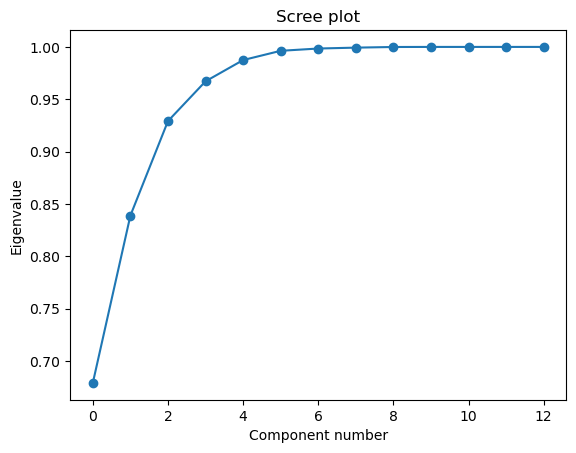

In [23]:
# Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xlabel('Component number')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')
plt.show()

# keeping 4 or 5 pcs should be enough (more than 95% variability explained)

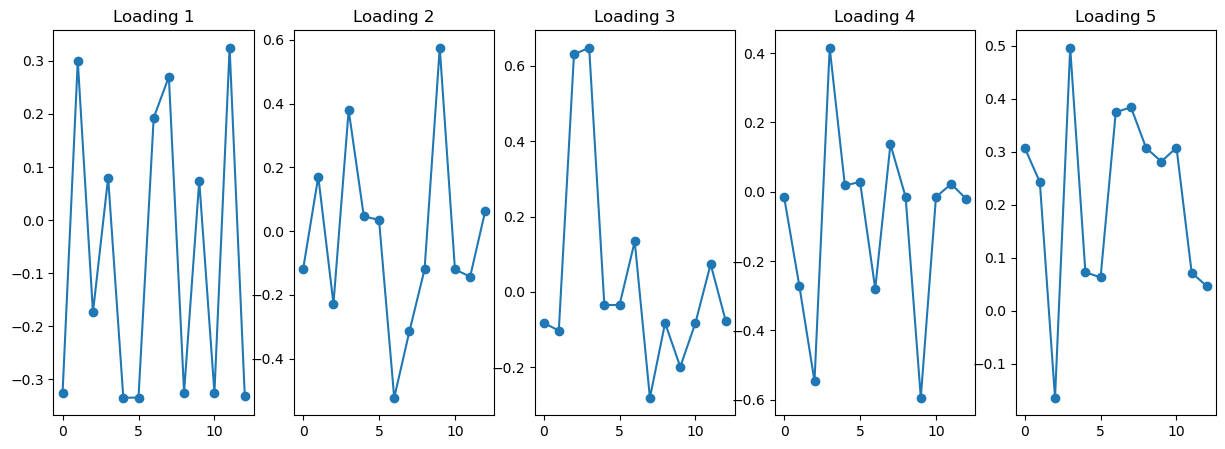

In [39]:
# Loadings
# Plot only the first k PCs
k = 5
fig, ax = plt.subplots(1, k, figsize = (15, 5))
for i in range(k):
   ax[i].plot(pca.components_[i], 'o-')
   ax[i].set_title('Loading ' + str(i+1))


In [ ]:
#to put names on x axis loadings
#why not giving names of columns? Interpretation problem?
#plt.xticks(ticks=np.arange(0, 13, step=1), labels=dataset.columns)